# Project with MIMIC-III

In [1]:
# import needed libraries

# plot inside the notebook
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

### collect the patient id and the expire flag (0 = survived, 1 = deceased) into array expire 

In [2]:
expire = np.array(np.loadtxt("PATIENTS.csv", delimiter = ',', skiprows = 1, usecols = (1,7)))
expire

array([[  2.49000000e+02,   0.00000000e+00],
       [  2.50000000e+02,   1.00000000e+00],
       [  2.51000000e+02,   0.00000000e+00],
       ..., 
       [  4.41230000e+04,   1.00000000e+00],
       [  4.41260000e+04,   0.00000000e+00],
       [  4.41280000e+04,   0.00000000e+00]])

### collect the patient id and the length of the ICU stay in days (LOS) into array LOS

In [3]:
LOS = np.array(np.genfromtxt("ICUSTAYS.csv", delimiter = ',', skip_header = 1, usecols = (1,11)))

In [4]:
# check for nan in LOS 
# for i in range(len(LOS[:,0])):
#    print(i, LOS[i,])

del_index = []
pat_ID = []
for i in range (len(LOS[:,0])):
    if(np.isnan(LOS[i,1]) == True):
        del_index.append(i)
        pat_ID.append(LOS[i,0])
        
# print(pat_ID)        
LOS = np.delete(LOS, del_index, 0)
LOS.shape

(61522, 2)

In [5]:
LOS

array([[  2.68000000e+02,   3.24900000e+00],
       [  2.69000000e+02,   3.27880000e+00],
       [  2.70000000e+02,   2.89390000e+00],
       ..., 
       [  9.49530000e+04,   9.25900000e-01],
       [  9.49540000e+04,   2.33460000e+00],
       [  9.49560000e+04,   4.50220000e+00]])

### collect the patient id and the number of procedures performed in the ICU into array num_proc 

In [6]:
num_proc = np.array(np.genfromtxt("PROCEDURES_ICD.csv", delimiter = ',', skip_header = 1, usecols = (1,3)))

In [7]:
# retain only the total number of procedures
del_index = []
for i in range(len(num_proc[:,0])-1) :
    if (num_proc[i,0] == num_proc[i+1,0]) :
        del_index.append(i)
        
num_proc = np.delete(num_proc, del_index, 0)    
num_proc.shape

(54699, 2)

### collect the patient id and the number of diagnoses in the ICU into array num_diag

In [8]:
num_diag = np.array(np.genfromtxt("DIAGNOSES_ICD.csv", delimiter = ',', skip_header = 1, usecols = (1,3)))
np.max(num_diag[:,1])

nan

In [9]:
del_index = []
pat_ID = []
for i in range (len(num_diag[:,0])):
    if(np.isnan(num_diag[i,1]) == True):
        del_index.append(i)
        pat_ID.append(num_diag[i,0])
        
print(pat_ID)        
num_diag = np.delete(num_diag, del_index, 0)
num_proc.shape

[417.0, 690.0, 937.0, 1490.0, 3369.0, 4791.0, 4023.0, 8818.0, 7544.0, 7880.0, 9896.0, 9998.0, 9035.0, 11519.0, 11740.0, 13890.0, 11438.0, 11245.0, 12607.0, 13262.0, 13567.0, 14219.0, 17269.0, 16213.0, 19092.0, 17964.0, 18605.0, 17796.0, 18006.0, 19617.0, 23407.0, 23987.0, 24188.0, 23081.0, 27934.0, 24886.0, 24975.0, 29175.0, 29096.0, 26690.0, 28700.0, 30405.0, 28388.0, 31928.0, 31866.0, 30940.0, 73686.0]


(54699, 2)

In [10]:
# retain only the total number of diagnoses
del_index = []
for i in range(len(num_diag[:,0])-1) :
    if (num_diag[i,0] == num_diag[i+1,0]) :
        del_index.append(i)
        
num_diag = np.delete(num_diag, del_index, 0)        
num_diag

array([[  1.09000000e+02,   1.40000000e+01],
       [  1.12000000e+02,   5.00000000e+00],
       [  1.13000000e+02,   3.00000000e+00],
       ..., 
       [  9.74920000e+04,   8.00000000e+00],
       [  9.74970000e+04,   9.00000000e+00],
       [  9.75030000e+04,   6.00000000e+00]])

### merge expire flag, the LOS, the num_proc and the num_diag into array dataset
array dataset header: "patient id", "expire flag", "LOS", "num_proc", "num_diag"

In [11]:
dataset = np.hstack([expire[:1000,:],np.array(np.zeros((1000,3)))])

In [12]:
for i in range(1000) :
    for j in range(len(LOS[:,0])) :               
        if (expire[i,0] == LOS[j,0]) :
            dataset[i,2] = LOS[j,1]

In [13]:
for i in range(1000) :
    for j in range(len(num_proc[:,0])) :               
        if (expire[i,0] == num_proc[j,0]) :
            dataset[i,3] = num_proc[j,1]       

In [14]:
for i in range(1000) :
    for j in range(len(num_diag[:,0])) :               
        if (expire[i,0] == num_diag[j,0]) :
            dataset[i,4] = num_diag[j,1]

In [15]:
# delete patients with no procedure record
del_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,3] == 0) :
        del_index.append(i)
print(del_index)  

dataset = np.delete(dataset, del_index, 0) 
del_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,4] == 0) :
        del_index.append(i)
print(del_index)        
dataset = np.delete(dataset, del_index, 0) 

dataset

[2, 7, 23, 29, 32, 37, 52, 73, 75, 99, 126, 151, 158, 160, 169, 184, 195, 199, 217, 237, 250, 264, 274, 294, 317, 333, 364, 366, 391, 415, 431, 448, 454, 483, 503, 516, 527, 544, 548, 568, 618, 619, 622, 637, 649, 654, 666, 684, 689, 690, 699, 718, 727, 729, 731, 748, 804, 808, 832, 838, 873, 900, 914, 950, 953, 958, 968, 970, 992, 997]
[]


array([[  2.49000000e+02,   0.00000000e+00,   1.06140000e+00,
          5.00000000e+00,   2.60000000e+01],
       [  2.50000000e+02,   1.00000000e+00,   1.06659000e+01,
          1.30000000e+01,   1.20000000e+01],
       [  2.52000000e+02,   0.00000000e+00,   2.57080000e+00,
          3.00000000e+00,   5.00000000e+00],
       ..., 
       [  9.38000000e+02,   1.00000000e+00,   2.10257000e+01,
          7.00000000e+00,   7.00000000e+00],
       [  9.40000000e+02,   1.00000000e+00,   5.68200000e-01,
          4.00000000e+00,   1.80000000e+01],
       [  9.41000000e+02,   0.00000000e+00,   1.64200000e-01,
          1.00000000e+00,   3.00000000e+00]])

In [ ]:
plt.plot(dataset[:,2],dataset[:,3],'go')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Number of Procedures Performed')
plt.show()

### Start EDA

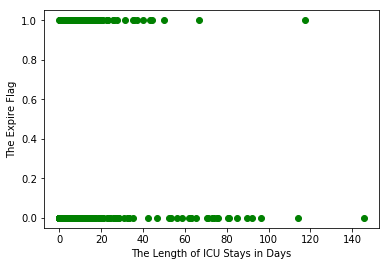

In [16]:
plt.plot(dataset[:,2],dataset[:,1],'go')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Expire Flag')
plt.show()

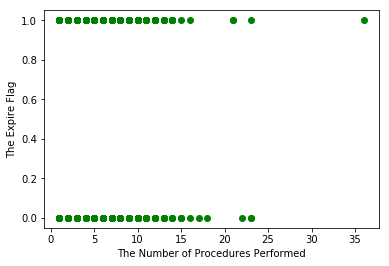

In [17]:
plt.plot(dataset[:,3],dataset[:,1],'go')
plt.xlabel('The Number of Procedures Performed')
plt.ylabel('The Expire Flag')
plt.show()

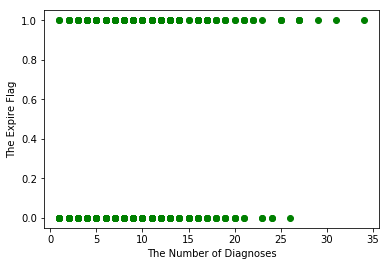

In [18]:
plt.plot(dataset[:,4],dataset[:,1],'go')
plt.xlabel('The Number of Diagnoses')
plt.ylabel('The Expire Flag')
plt.show()

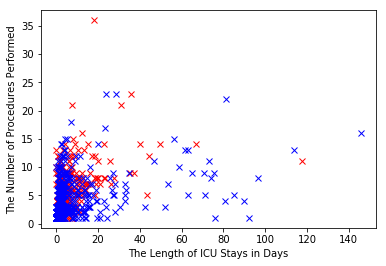

In [19]:
survived_index = []
deceased_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,1] == 0) :
        survived_index.append(i)
    else :
        deceased_index.append(i)
        
survived = np.delete(dataset, deceased_index, 0)
deceased = np.delete(dataset, survived_index, 0)
plt.plot(deceased[:,2],deceased[:,3], 'rx', survived[:,2],survived[:,3], 'bx')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Number of Procedures Performed')
plt.show()

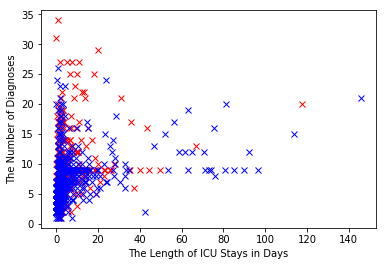

In [20]:
survived_index = []
deceased_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,1] == 0) :
        survived_index.append(i)
    else :
        deceased_index.append(i)
        
survived = np.delete(dataset, deceased_index, 0)
deceased = np.delete(dataset, survived_index, 0)
plt.plot(deceased[:,2],deceased[:,4], 'rx', survived[:,2],survived[:,4], 'bx')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Number of Diagnoses')
plt.show()

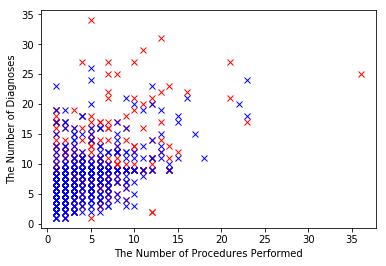

In [21]:
survived_index = []
deceased_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,1] == 0) :
        survived_index.append(i)
    else :
        deceased_index.append(i)
        
survived = np.delete(dataset, deceased_index, 0)
deceased = np.delete(dataset, survived_index, 0)
plt.plot(deceased[:,3],deceased[:,4], 'rx', survived[:,3],survived[:,4], 'bx')
plt.xlabel('The Number of Procedures Performed')
plt.ylabel('The Number of Diagnoses')
plt.show()

#### From the graph above, we can hardly see any correlation between the expire flag and three features selected.  We shouldn't expect anything better than 50% accuracy.

### Logistic Regression Model for the Expire Flag in terms of LOS and num_proc

In [22]:
# preparing input X and outupt Y 
X = dataset[:,2:4]
Y = dataset[:,1]

In [23]:
# import needed scikitlearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [24]:
# create and train a logistic regression model
model = LogisticRegression()
model = model.fit(X, Y)

# the accuracy on the training set
print("The Model accuracy: %.2f%%" %(model.score(X, Y)*100))

The Model accuracy: 63.23%


In [25]:
# evaluate the model using 5-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=5)
print ("The Mean Accuracy of 5-fold Cross Validation: %.2f%%" %(scores.mean()*100))

The Mean Accuracy of 5-fold Cross Validation: 63.12%


#### Only with two featuers, we acheived above 60% model accuracy in both training set and 5-fold cross validation.  

### adding one more feature (num_diag)

In [26]:
# preparing input X and outupt Y 
X = dataset[:,2:]
Y = dataset[:,1]

In [27]:
# create and train a logistic regression model
model = LogisticRegression()
model = model.fit(X, Y)

# the accuracy on the training set
print("The Model accuracy: %.2f%%" %(model.score(X, Y)*100))

The Model accuracy: 64.95%


In [28]:
# evaluate the model using 5-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=5)
print ("The Mean Accuracy of 5-fold Cross Validation: %.2f%%" %(scores.mean()*100))

The Mean Accuracy of 5-fold Cross Validation: 64.96%


#### Adding one more feature improved the model accuracy ~2% 

###  Classification using a neural network (NN) with one hidden layer with 5 nodes   

In [29]:
# import needed keras libraries
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [30]:
# create and compile a NN model
model = Sequential()
model.add(Dense(5, input_dim = 3, init = 'normal', activation = 'relu'))
model.add(Dense(1, init = 'normal', activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
# train NN model (experiment with nb_epoch and batch_size)
model.fit(X, Y, nb_epoch = 100, batch_size = 10)

Epoch 1/100
930/930 [==============================] - 1s - loss: 0.6854 - acc: 0.6269      

In [32]:
# evaluate the model accuracy
scores = model.evaluate(X, Y)
print("\nThe Modal Accuracy: %.2f%%" % (scores[1]*100))

930/930 [==============================] - 0s     

The Modal Accuracy: 68.06%


#### A vanilla neural network with only one hidden layer achieved another 3% improvement in the model accuracy.